## DISEASE PREDICTION PROJECT ##

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

#### READING THE TRAINING DATASET AND EXPLORING IT 

In [61]:
data = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv') 

In [62]:
data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

## DATA PREPROCESSING

In [63]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [65]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.0,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.04

In [66]:
data.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [67]:
print(data.prognosis.nunique())

41


In [68]:
data_types = data.dtypes.to_dict()
data_types

{'itching': dtype('int64'),
 'skin_rash': dtype('int64'),
 'nodal_skin_eruptions': dtype('int64'),
 'continuous_sneezing': dtype('int64'),
 'shivering': dtype('int64'),
 'chills': dtype('int64'),
 'joint_pain': dtype('int64'),
 'stomach_pain': dtype('int64'),
 'acidity': dtype('int64'),
 'ulcers_on_tongue': dtype('int64'),
 'muscle_wasting': dtype('int64'),
 'vomiting': dtype('int64'),
 'burning_micturition': dtype('int64'),
 'spotting_ urination': dtype('int64'),
 'fatigue': dtype('int64'),
 'weight_gain': dtype('int64'),
 'anxiety': dtype('int64'),
 'cold_hands_and_feets': dtype('int64'),
 'mood_swings': dtype('int64'),
 'weight_loss': dtype('int64'),
 'restlessness': dtype('int64'),
 'lethargy': dtype('int64'),
 'patches_in_throat': dtype('int64'),
 'irregular_sugar_level': dtype('int64'),
 'cough': dtype('int64'),
 'high_fever': dtype('int64'),
 'sunken_eyes': dtype('int64'),
 'breathlessness': dtype('int64'),
 'sweating': dtype('int64'),
 'dehydration': dtype('int64'),
 'indigesti

In [69]:
data.prognosis.dtype

dtype('O')

In [70]:
# Drop irrelevant columns (e.g., 'Unnamed: 133' which contains NaN)
data.drop(columns=['Unnamed: 133'], inplace=True, errors='ignore')

In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

# Assuming your DataFrame is named 'data'
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']  # Target

# Calculate mutual information
mutual_info = mutual_info_classif(X, y, discrete_features='auto')

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Check if the confusion matrix has at least 2 rows and 2 columns
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return 0  # Return 0 if there is not enough variability
    
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - 1
    kcorr = k - 1
    
    # Avoid division by zero
    if min(kcorr, rcorr) == 0:
        return 0  # Return 0 if either kcorr or rcorr is 0
    
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

# Calculate Cramér's V for each feature
cramers_v_results = []
for col in X.columns:
    cramers_v_results.append(cramers_v(X[col], y))

# Create a DataFrame with the results
results = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info,
    'Cramér\'s V': cramers_v_results
})

# Sort the DataFrame based on mutual information
results = results.sort_values('Mutual Information', ascending=False)
print(results)

                 Feature  Mutual Information  Cramér's V
14               fatigue            0.589551    0.951550
11              vomiting            0.583286    0.944225
25            high_fever            0.531938    0.958365
34                nausea            0.513052    0.966184
35      loss_of_appetite            0.510350    0.969981
..                   ...                 ...         ...
57     weakness_in_limbs            0.088570    0.943199
103   watering_from_eyes            0.088462    0.943199
124             scurring            0.085903    0.943199
90   foul_smell_of urine            0.068124    0.915802
45        fluid_overload            0.000000    0.000000

[132 rows x 3 columns]


In [72]:
results.tail(50)

,Feature,Mutual Information,Cramér's V
26,sunken_eyes,0.109187,0.943199
120,palpitations,0.109166,0.995926
70,puffy_face_and_eyes,0.109119,0.969888
107,mucoid_sputum,0.108812,0.969888
119,prominent_veins_on_calf,0.108795,0.969888
86,unsteadiness,0.108103,0.969888
117,fluid_overload.1,0.107857,0.969888
71,enlarged_thyroid,0.107755,0.995926
130,red_sore_around_nose,0.107438,0.969888
110,visual_disturbances,0.107394,0.969888


In [73]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Missing Values in Each Column:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [74]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


## CHECKING FOR OUTLIERS

In [75]:
from sklearn.ensemble import IsolationForest

# Assuming 'data' is your DataFrame
X = data.drop('prognosis', axis=1)  # Features

# Initialize the Isolation Forest model
model = IsolationForest(contamination='auto')

# Fit the model to the data
model.fit(X)

# Get the outlier scores
outlier_scores = model.decision_function(X)

# Identify outliers based on the outlier scores
outliers = X.loc[model.predict(X) == -1]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")

# Print the outliers
print(outliers)

Number of outliers: 0
Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, nec

In [76]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## VISUALIZATIONS

In [77]:
data['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

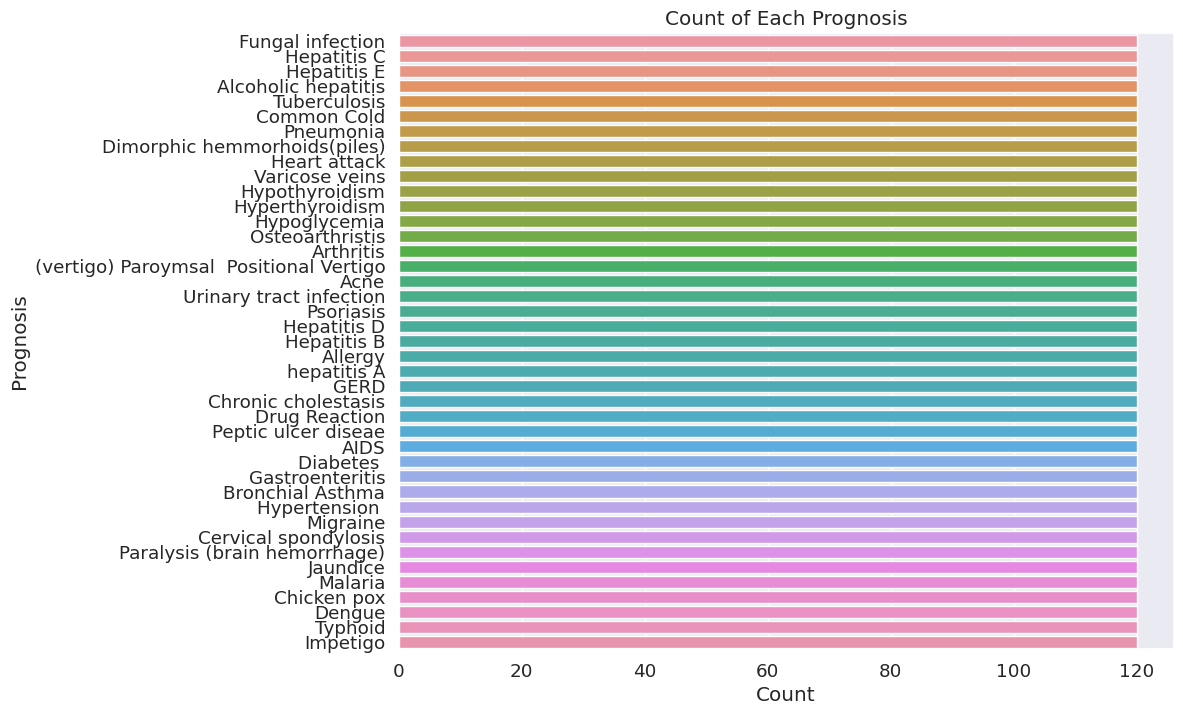

In [78]:

# Count plot of the target variable (prognosis)
plt.figure(figsize=(10, 8))
sns.countplot(y='prognosis', data=data, order=data['prognosis'].value_counts().index)
plt.title('Count of Each Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.show()


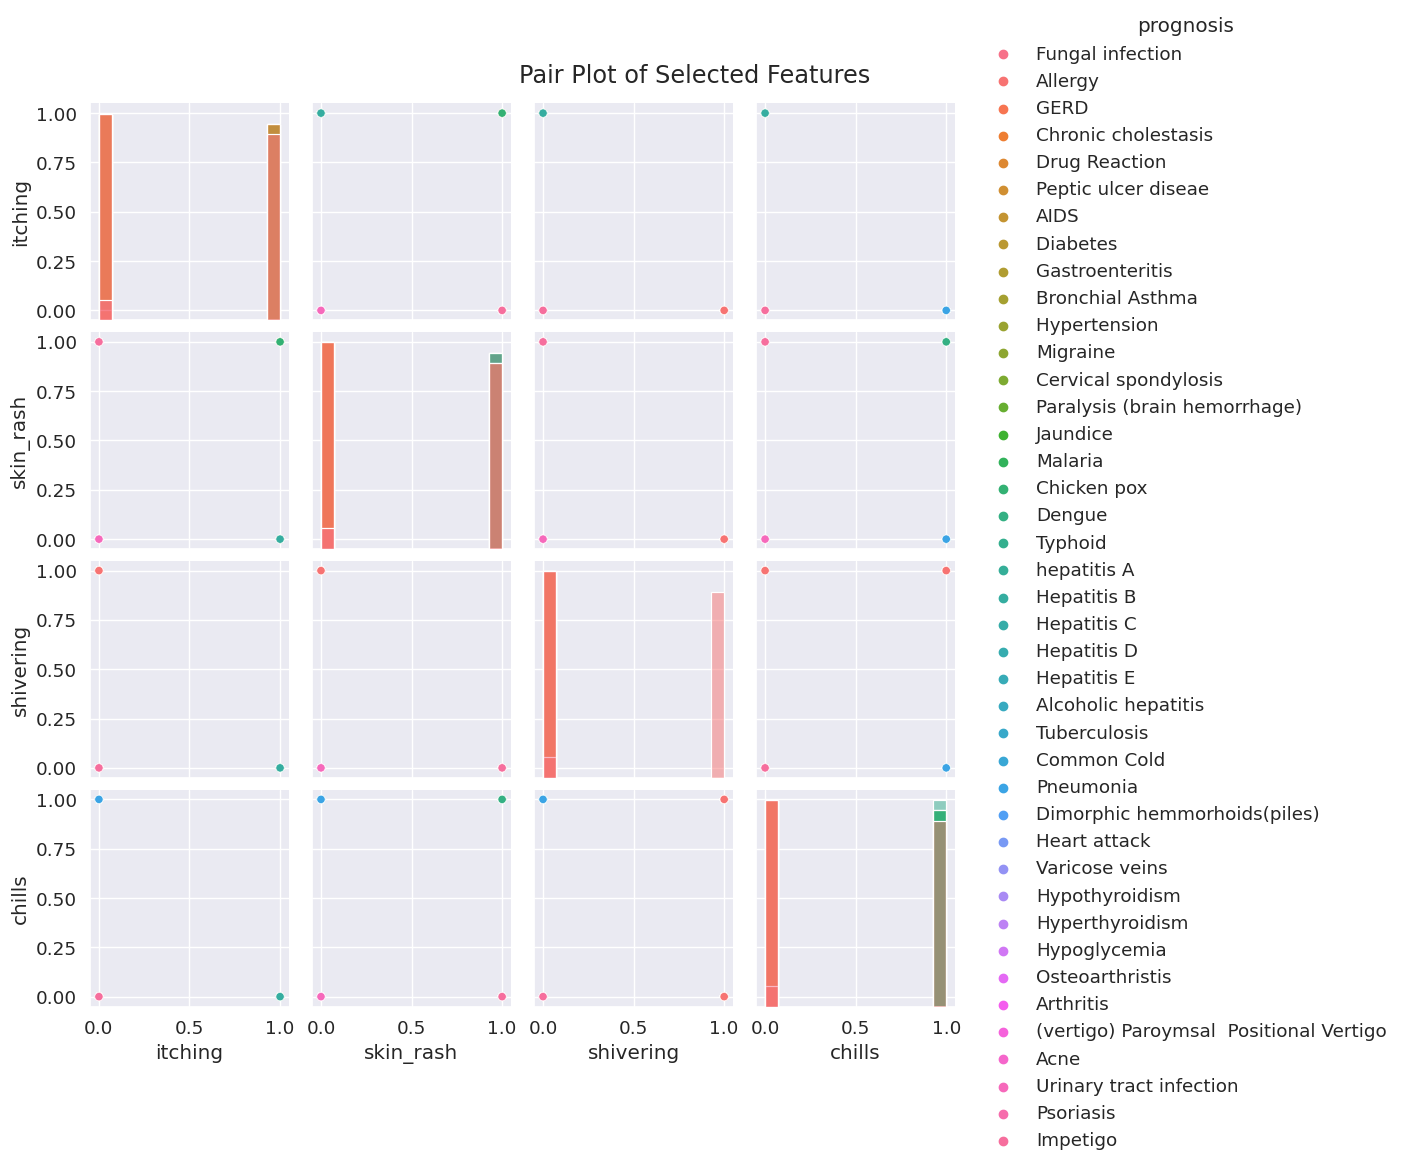

In [83]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select features for the pair plot
selected_features = ['itching', 'skin_rash', 'shivering', 'chills', 'prognosis']

# Create the pair plot
sns.pairplot(data[selected_features], hue='prognosis', diag_kind='hist')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

## Pair Plot of Selected Features
### The pair plot visualizes pairwise relationships between selected features.

## Insights:
### The plot shows the distribution of each feature along the diagonal and scatter plots for feature pairs.
### If certain features show distinct clusters or patterns, this could indicate potential for classification. However, if most features show limited variance, it suggests that they might not be very informative.

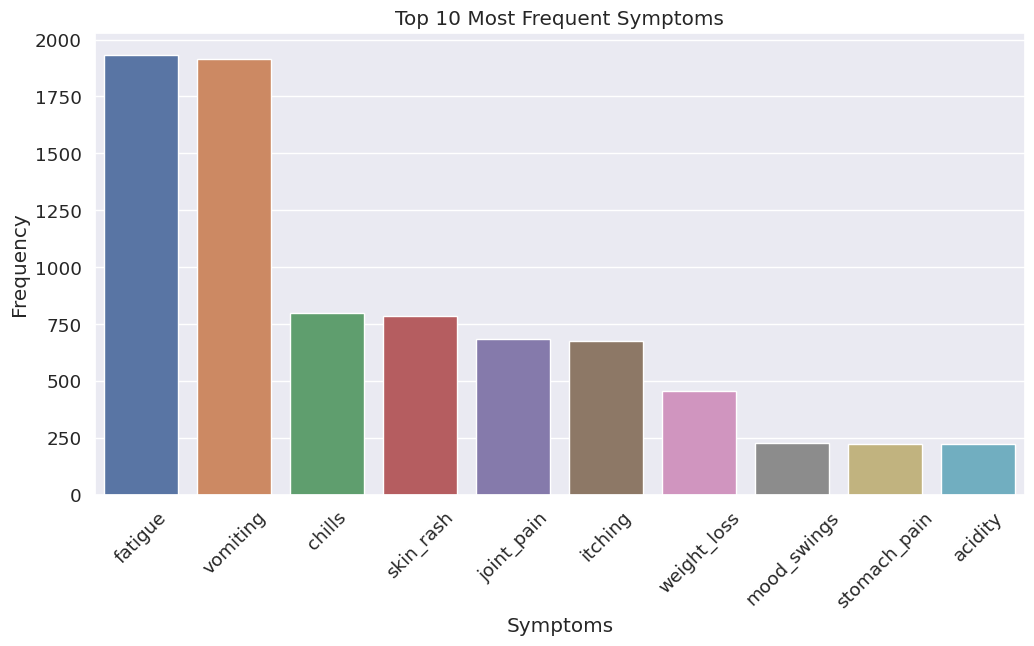

In [88]:
features = data.columns[:20].tolist()  # Replace with your actual feature names

# Calculate the sum of each feature
symptom_sums = data[features].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_sums.index[:10], y=symptom_sums.values[:10])
plt.title('Top 10 Most Frequent Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

 ## Bar Plot of Symptom Frequency
### This bar plot displays the top 10 most frequent symptoms.

## Insights:
### Symptoms like "fatigue" and "vomiting" appear to be the most common.
### This information can guide healthcare practitioners in identifying and prioritizing symptoms for further investigation or treatment.

## Splitting dataset

In [95]:
from sklearn.model_selection import train_test_split

X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis'] 

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2952, 132)
y_train shape: (2952,)
X_val shape: (984, 132)
y_val shape: (984,)
X_test shape: (984, 132)
y_test shape: (984,)


## Tranining and testing the dataset


## XGBOOST

In [108]:
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = random_search.best_params_
print("Best Parameters:", best_params_xgb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.5}


In [109]:
# Train the model with the best parameters
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = best_xgb.predict(X_val)


# Classification Report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        20
          17       1.00    

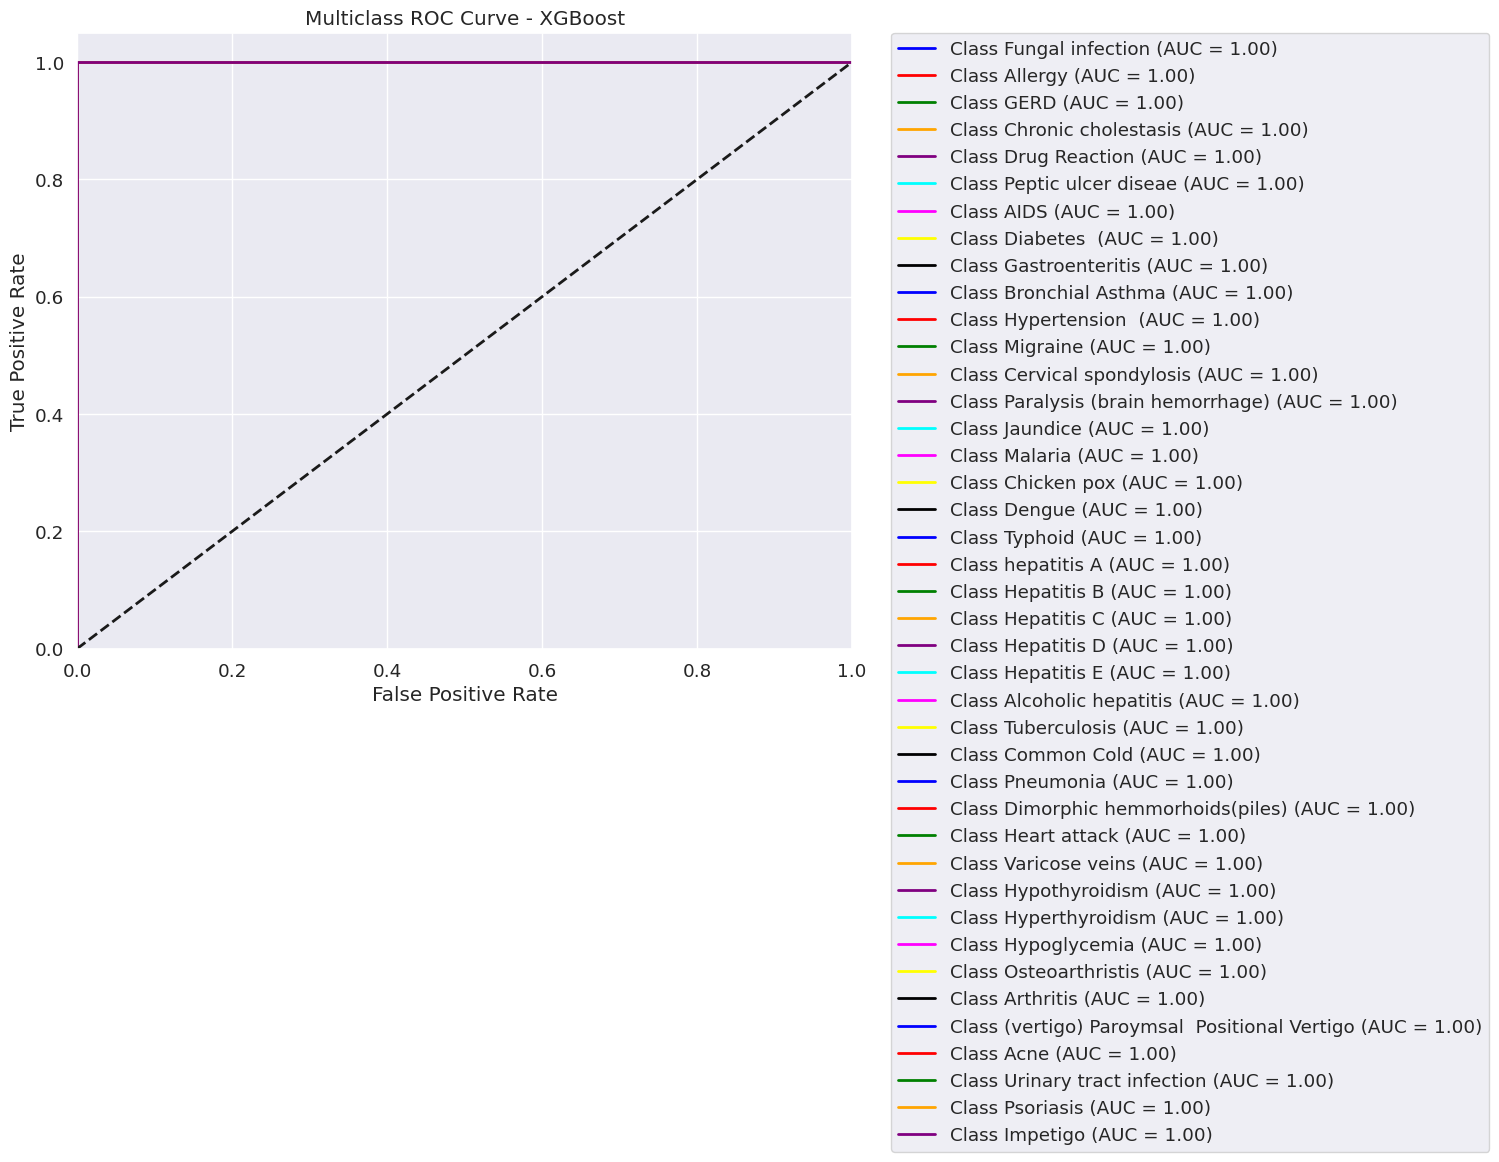

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_test and best_xgb.predict_proba(X_test) are defined
n_classes = 41

classes = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# XGBoost ROC curve
y_probs_xgb = best_xgb.predict_proba(X_test)

# Initialize dictionaries to hold FPR, TPR, and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_xgb[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs_xgb[:, i])

# Plot ROC for all classes
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black'])

for i, color in zip(range(n_classes), cycle(colors)):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - XGBoost')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


## LGBOOST

In [113]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Define the LightGBM classifier
lgbm = lgb.LGBMClassifier(verbose=-1)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 3, 5, 7, 9],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'num_leaves': [31, 50, 100],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params_lgb = random_search.best_params_
print("Best Parameters:", best_params_lgb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.5, 'num_leaves': 31, 'n_estimators': 50, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [116]:
# Train the model with the best parameters
best_lgb = random_search.best_estimator_
best_lgb.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = best_lgb.predict(X_val)

# Classification Report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        20
          17       1.00    

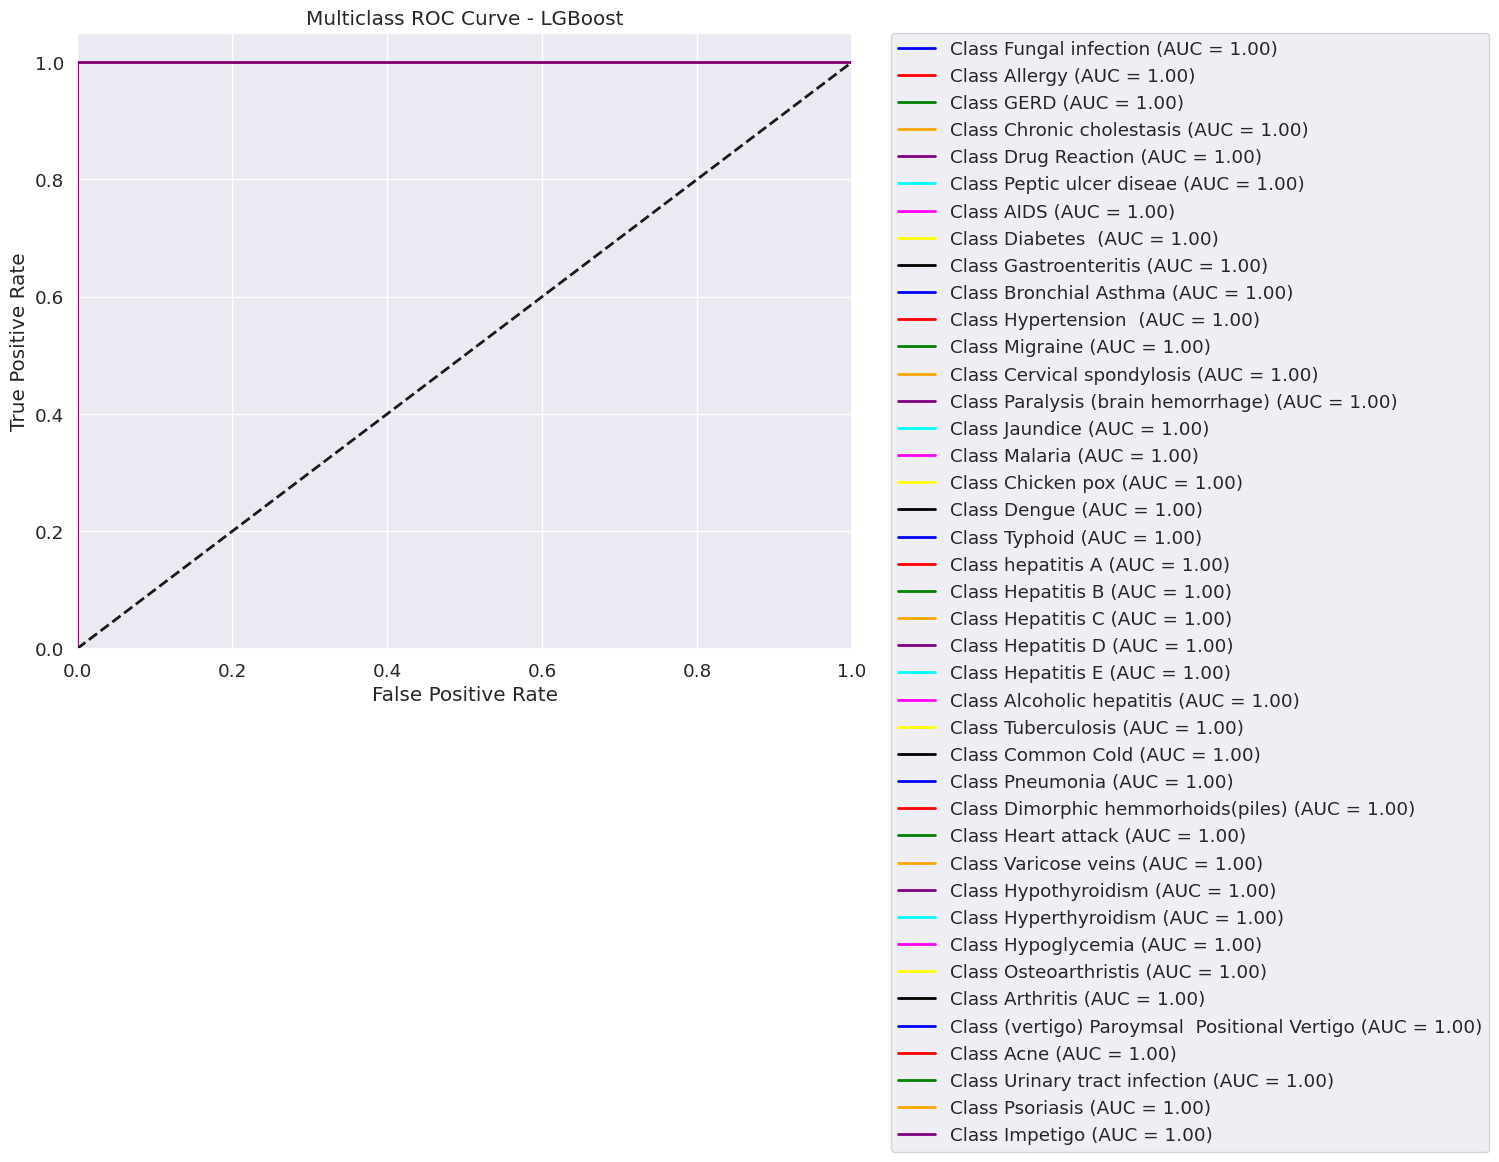

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_test and best_xgb.predict_proba(X_test) are defined
n_classes = 41

classes = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# XGBoost ROC curve
y_probs_lgb = best_lgb.predict_proba(X_test)

# Initialize dictionaries to hold FPR, TPR, and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_lgb[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs_lgb[:, i])

# Plot ROC for all classes
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black'])

for i, color in zip(range(n_classes), cycle(colors)):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - LGBoost')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


In [122]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SVM Classifier
svm_model = SVC(kernel='linear', C=1,probability=True, random_state=42)

# Start timing for training
start_time = time.time()

# Train the model
svm_model.fit(X_train, y_train)

# Cross-validation with 5 folds
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Calculate training duration
training_duration = time.time() - start_time

# Predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Training Duration (s): {training_duration}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Training Accuracy: 1.0
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0
Training Duration (s): 3.9150760173797607


## SVM

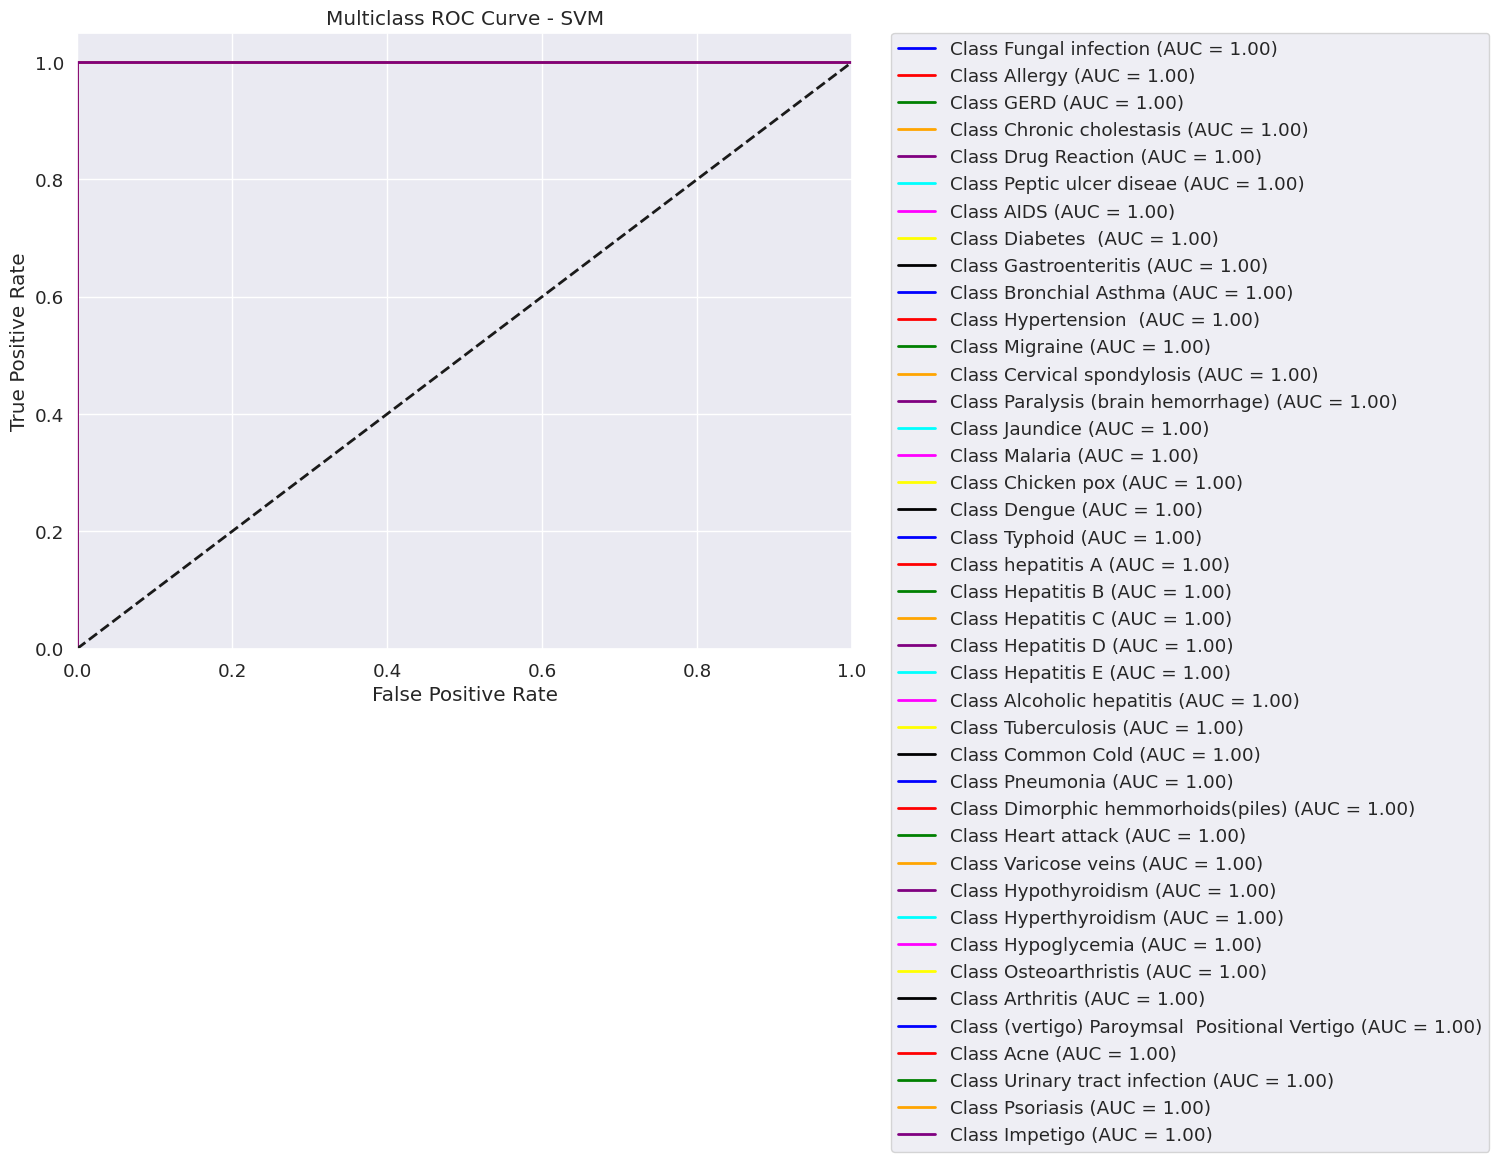

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_test and best_xgb.predict_proba(X_test) are defined
n_classes = 41

classes = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# XGBoost ROC curve
y_probs_svm = svm_model.predict_proba(X_test)

# Initialize dictionaries to hold FPR, TPR, and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_svm[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs_svm[:, i])

# Plot ROC for all classes
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black'])

for i, color in zip(range(n_classes), cycle(colors)):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - SVM')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


## CAT

In [124]:
# Import necessary libraries for CatBoost
from catboost import CatBoostClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost Classifier
cat_model = CatBoostClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42, verbose=0)

# Start timing for training
start_time = time.time()

# Train the model
cat_model.fit(X_train, y_train)

# Cross-validation with 5 folds
cv_scores = cross_val_score(cat_model, X_train, y_train, cv=5)

# Calculate training duration
training_duration = time.time() - start_time

# Predictions
y_pred_train = cat_model.predict(X_train)
y_pred_test = cat_model.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Training Duration (s): {training_duration}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Training Accuracy: 1.0
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0
Training Duration (s): 415.03501629829407


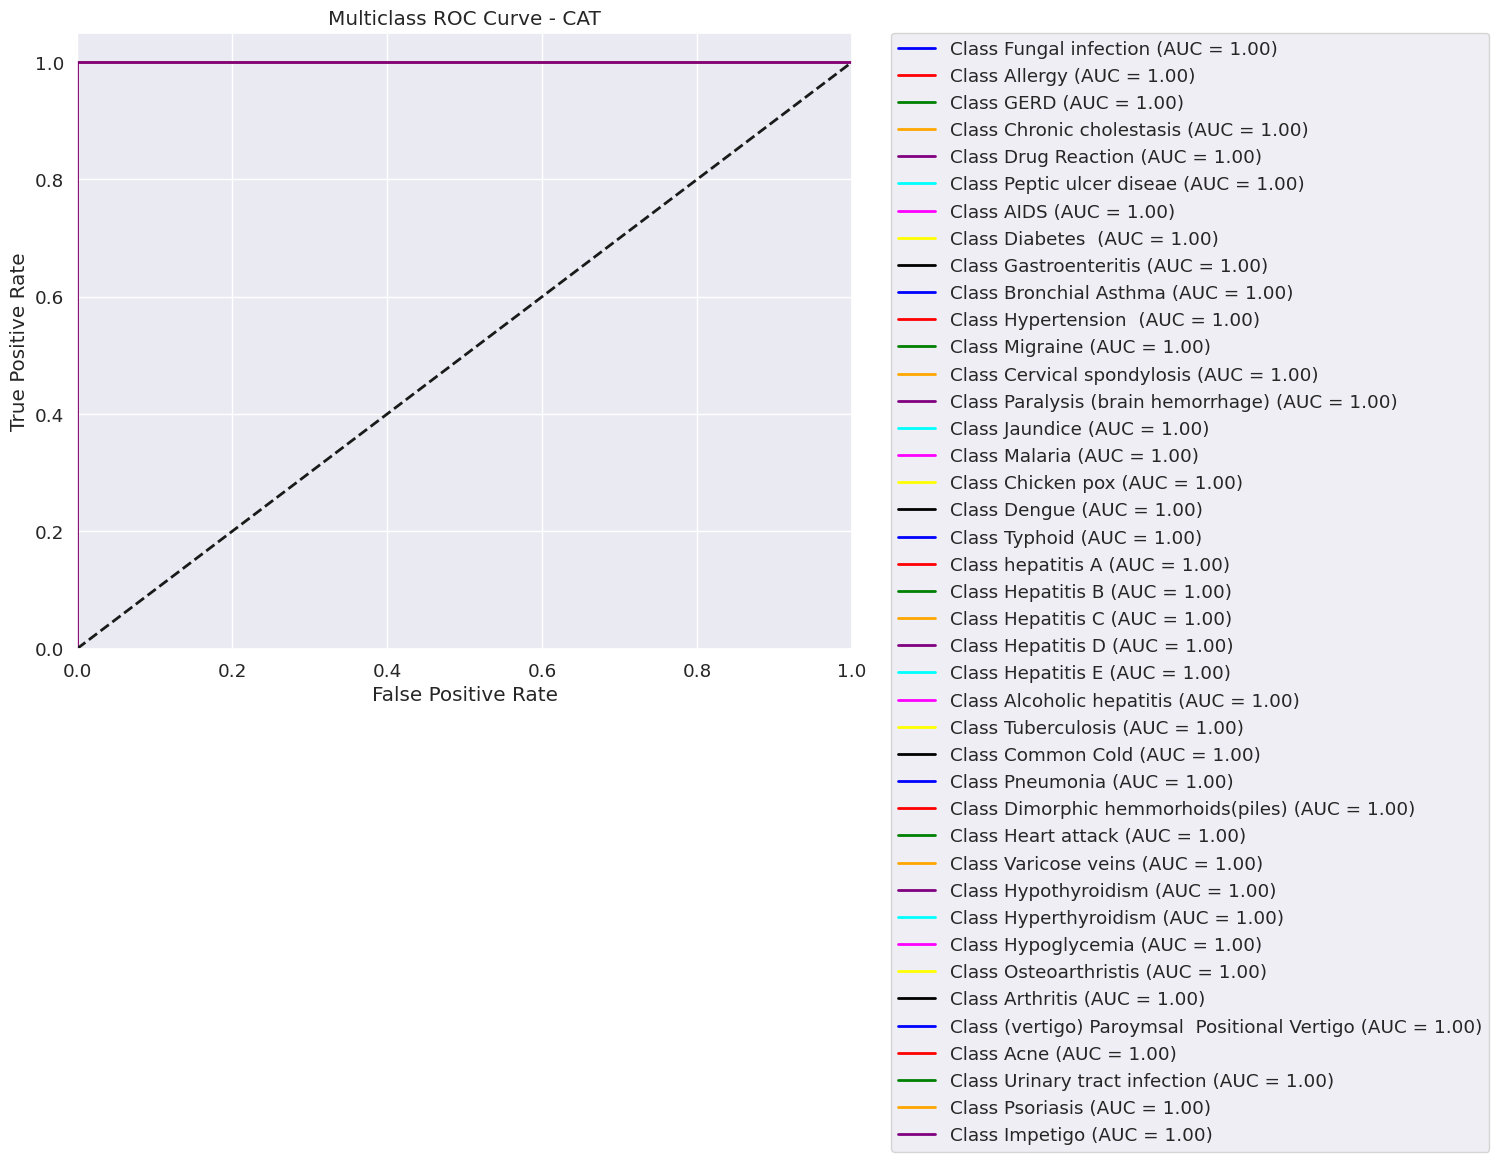

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

n_classes = 41

classes = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# XGBoost ROC curve
y_probs_cat = cat_model.predict_proba(X_test)

# Initialize dictionaries to hold FPR, TPR, and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_cat[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs_cat[:, i])

# Plot ROC for all classes
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black'])

for i, color in zip(range(n_classes), cycle(colors)):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - CAT')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


# TESTING USING EXTERNAL TESTING DATA

In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the external dataset
external_data = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')  # Replace with the correct file path

# Ensure the columns in external_data match the expected structure
X_external = external_data.drop('prognosis', axis=1)  # Features
y_external = external_data['prognosis']  # Target

# Encode the target variable for the external dataset
label_encoder_external = LabelEncoder()
y_external_encoded = label_encoder_external.fit_transform(y_external)

# Print the shapes of the external dataset (no splitting, only for testing)
print("External X_test shape:", X_external.shape)
print("External y_test shape:", y_external_encoded.shape)


External X_test shape: (42, 132)
External y_test shape: (42,)


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List to hold performance metrics
performance_metrics = []

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 50)
    
    performance_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [130]:
# Evaluate best_xgb
evaluate_model(best_xgb, X_external, y_external_encoded, "XGBoost")

# Evaluate best_lgb
evaluate_model(best_lgb, X_external, y_external_encoded, "LightGBM")

# Evaluate svm_model
evaluate_model(svm_model, X_external, y_external_encoded, "SVM")

# Evaluate cat_model
evaluate_model(cat_model, X_external, y_external_encoded, "CatBoost")

Performance of XGBoost:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------
Performance of LightGBM:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------
Performance of SVM:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------
Performance of CatBoost:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------


In [132]:
performance_df = pd.DataFrame(performance_metrics)
print("\nPerformance Summary:")
performance_df



Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,1.0,1.0,1.0,1.0
1,LightGBM,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0
3,CatBoost,1.0,1.0,1.0,1.0


## FUNCTION FOR PREDICTING DISEASES USING THE MODELS

In [269]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def predict_disease(symptoms_input, models, label_encoder, classes):
    """
    Predicts disease based on symptoms input using multiple models and selects the most frequent prediction.
    
    Args:
    symptoms_input (array-like): Input symptoms as features (must match the feature columns used in training).
    models (list): List of trained models.
    label_encoder (LabelEncoder): The label encoder used for encoding and decoding disease labels.
    
    Returns:
    str: The predicted disease (most frequent prediction).
    """
    
    # Convert symptoms input to DataFrame
    symptoms_df = pd.DataFrame([symptoms_input], columns=columns)
    
    model_predictions = []
    
    for model in models:
        # Make prediction
        prediction = model.predict(symptoms_df)
        
        # Flatten the prediction if it's an array
        if isinstance(prediction, np.ndarray):
            prediction = prediction.flatten()
        
        # Append the first element if prediction is an array
        if len(prediction) > 1:
            prediction = prediction[0]
        
        model_predictions.append(prediction)
    
    # Ensure all predictions are integers (if they are not already)
    model_predictions = [int(pred) for pred in model_predictions]
#     print(f"Model Predictions: {model_predictions}")

    # Find the most frequent prediction (mode)
    most_common_prediction = Counter(model_predictions).most_common(1)[0][0]  
    
        # Validate the index
    if most_common_prediction >= len(classes):
        predicted_disease = 'Invalid index'
    else:
        predicted_disease = classes[most_common_prediction]
    
    return predicted_disease

In [270]:
# Define the symptoms with their values
symptoms_input = {
    'itching': 0,
    'skin_rash': 0,
    'nodal_skin_eruptions': 1,
    'continuous_sneezing': 0,
    'shivering': 0,
    'chills': 0,
    'joint_pain': 1,
    'stomach_pain': 0,
    'acidity': 0,
    'ulcers_on_tongue': 0,
    'muscle_wasting': 0,
    'vomiting': 0,
    'burning_micturition': 0,
    'spotting_ urination': 0,
    'fatigue': 1,
    'weight_gain': 0,
    'anxiety': 0,
    'cold_hands_and_feets': 0,
    'mood_swings': 0,
    'weight_loss': 0,
    'restlessness': 0,
    'lethargy': 1,
    'patches_in_throat': 0,
    'irregular_sugar_level': 0,
    'cough': 0,
    'high_fever': 0,
    'sunken_eyes': 0,
    'breathlessness': 0,
    'sweating': 0,
    'dehydration': 0,
    'indigestion': 0,
    'headache': 0,
    'yellowish_skin': 0,
    'dark_urine': 0,
    'nausea': 0,
    'loss_of_appetite': 0,
    'pain_behind_the_eyes': 0,
    'back_pain': 0,
    'constipation': 0,
    'abdominal_pain': 0,
    'diarrhoea': 0,
    'mild_fever': 0,
    'yellow_urine': 0,
    'yellowing_of_eyes': 0,
    'acute_liver_failure': 0,
    'fluid_overload': 0,
    'swelling_of_stomach': 0,
    'swelled_lymph_nodes': 0,
    'malaise': 0,
    'blurred_and_distorted_vision': 0,
    'phlegm': 0,
    'throat_irritation': 0,
    'redness_of_eyes': 0,
    'sinus_pressure': 0,
    'runny_nose': 0,
    'congestion': 0,
    'chest_pain': 0,
    'weakness_in_limbs': 0,
    'fast_heart_rate': 0,
    'pain_during_bowel_movements': 0,
    'pain_in_anal_region': 0,
    'bloody_stool': 0,
    'irritation_in_anus': 0,
    'neck_pain': 0,
    'dizziness': 0,
    'cramps': 0,
    'bruising': 0,
    'obesity': 0,
    'swollen_legs': 0,
    'swollen_blood_vessels': 0,
    'puffy_face_and_eyes': 0,
    'enlarged_thyroid': 0,
    'brittle_nails': 0,
    'swollen_extremeties': 0,
    'excessive_hunger': 0,
    'extra_marital_contacts': 0,
    'drying_and_tingling_lips': 0,
    'slurred_speech': 0,
    'knee_pain': 0,
    'hip_joint_pain': 0,
    'muscle_weakness': 0,
    'stiff_neck': 0,
    'swelling_joints': 0,
    'movement_stiffness': 0,
    'spinning_movements': 0,
    'loss_of_balance': 0,
    'unsteadiness': 0,
    'weakness_of_one_body_side': 0,
    'loss_of_smell': 0,
    'bladder_discomfort': 0,
    'foul_smell_of urine': 0,
    'continuous_feel_of_urine': 0,
    'passage_of_gases': 0,
    'internal_itching': 0,
    'toxic_look_(typhos)': 0,
    'depression': 0,
    'irritability': 0,
    'muscle_pain': 0,
    'altered_sensorium': 0,
    'red_spots_over_body': 0,
    'belly_pain': 0,
    'abnormal_menstruation': 0,
    'dischromic _patches': 0,
    'watering_from_eyes': 0,
    'increased_appetite': 0,
    'polyuria': 0,
    'family_history': 0,
    'mucoid_sputum': 0,
    'rusty_sputum': 0,
    'lack_of_concentration': 0,
    'visual_disturbances': 0,
    'receiving_blood_transfusion': 0,
    'receiving_unsterile_injections': 0,
    'coma': 0,
    'stomach_bleeding': 0,
    'distention_of_abdomen': 0,
    'history_of_alcohol_consumption': 0,
    'fluid_overload.1': 0,
    'blood_in_sputum': 0,
    'prominent_veins_on_calf': 0,
    'palpitations': 0,
    'painful_walking': 0,
    'pus_filled_pimples': 0,
    'blackheads': 0,
    'scurring': 0,
    'skin_peeling': 0,
    'silver_like_dusting': 0,
    'small_dents_in_nails': 0,
    'inflammatory_nails': 0,
    'blister': 0,
    'red_sore_around_nose': 0,
    'yellow_crust_ooze': 0
}

columns = list(symptoms_input.keys())

In [271]:
predicted_disease = predict_disease(symptoms_input, [best_xgb, best_lgb, svm_model, cat_model], label_encoder, classes)

/tmp/ipykernel_37/481348641.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_predictions = [int(pred) for pred in model_predictions]


In [272]:
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Malaria
